<a href="https://colab.research.google.com/github/RedPandaStyle/ACE-Predictive-Analytics/blob/main/Titanic_Analysis_Test_Data_JPV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [83]:
# Run a regression analysis on the titanic dataset. 

#Task 2a: Install the Needed Libraries

In [84]:
# No new libraries needed

#Task 2b: Import the Needed Libraries

In [85]:
# Import pandas, numpy, matpltlib, seaborn, cufflinks, LinearRegression, Train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Task 3: Load the Data

In [86]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_test.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

In [87]:
# Analyze and clean out any nulls

##Show the data

In [88]:
# Show Data
data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##Get Data Info

In [89]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
# Find Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##Find Missing Values

In [91]:
# display nulls
data.isnull()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [92]:
# Display true or false 
data.isnull().values.any()

True

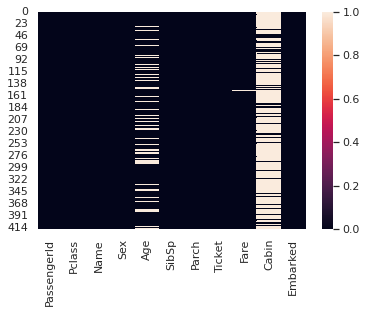

In [93]:
# heat map to find null values in columns.
sns.heatmap(data.isnull())

In [94]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#Task 5: Perform Data Cleaning

In [95]:
### Drop cabin because it has too many null values and imputing will create bias.
del data['Cabin']

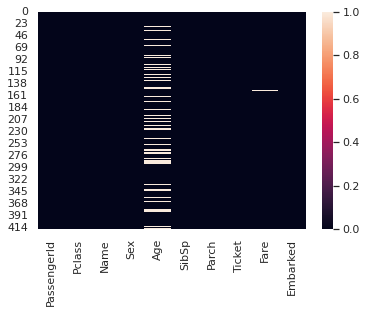

In [96]:
sns.heatmap(data.isnull())

In [99]:
# Impute age. Create a loop that imputes and age into nulls
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [100]:
# apply the function into the dataframe
data['Age']= data[['Age','Pclass']].apply(impute_age, axis=1)

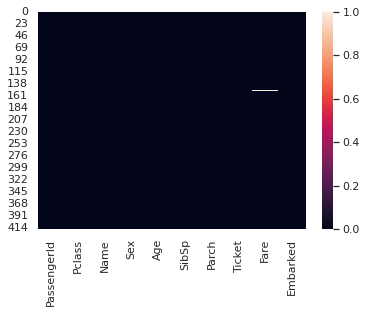

In [101]:
# Visually confirm nulls are gone
sns.heatmap(data.isnull())

In [102]:
# change age into int
data['Age'] = data['Age'].astype('int')


In [103]:
# confirm age int
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 32.8+ KB


In [ ]:
# numeric encoding of sex. Male = 0, Female = 1 
data['Sex']=

#Task 6: Visualize Cleaned up Dataset

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

#Task 9: Choose the ML Method to follow

#Task 10: Train the ML Model

#Task 11: Test the Model